In [1]:
import scanpy.api as sc
import pandas as pd

sc.settings.set_figure_params(dpi=100)
sc.settings.verbosity = 3
result_file = 'TM_droplet.h5ad'

In [2]:
adata = sc.read_h5ad('./data/TM_droplet_mat.h5ad').T

In [25]:
adata.obs = pd.read_csv('data/TM_droplet_metadata.csv', index_col='cell')

In [31]:
sc.pp.pca(adata)

In [36]:
sc.pp.neighbors(adata)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:22.74) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix


In [37]:
sc.tl.umap(adata)

computing UMAP
    finished (0:01:13.23) --> added
    'X_umap', UMAP coordinates (adata.obsm)


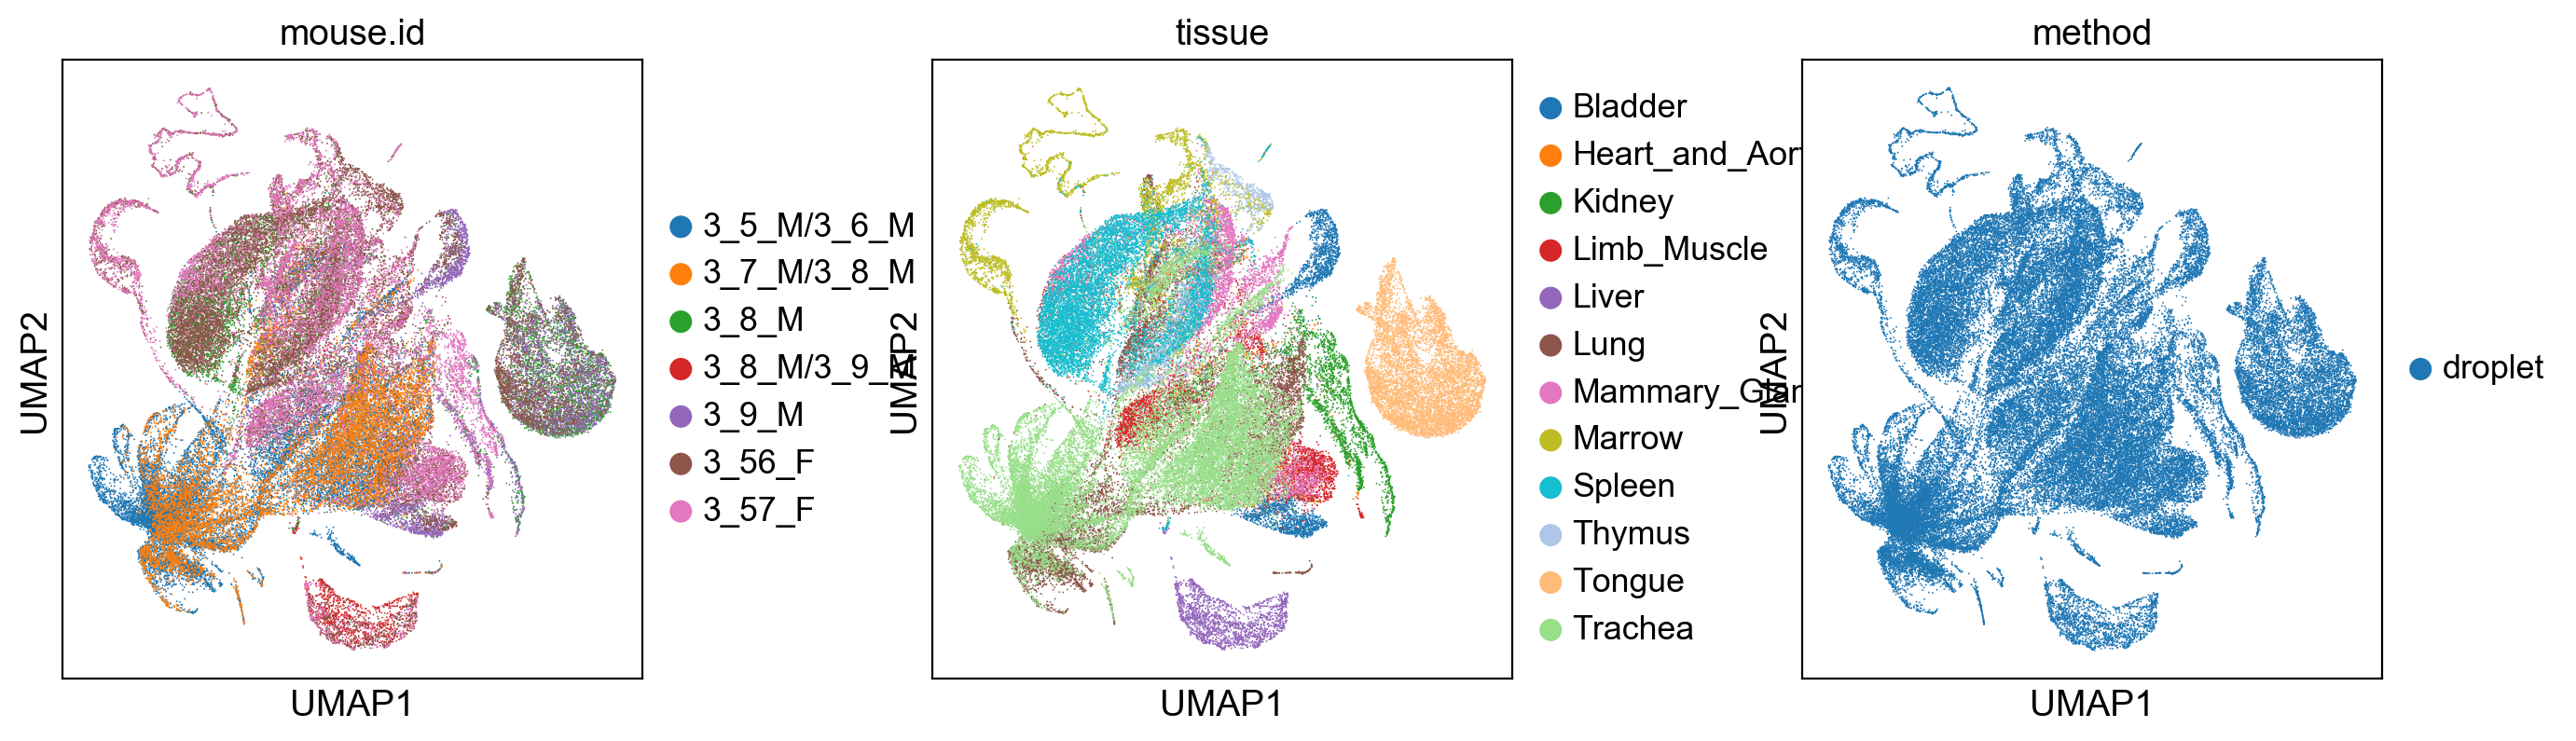

In [45]:
sc.pl.umap(adata, color=['mouse.id', 'tissue', 'method'])

In [40]:
sc.tl.tsne(adata)

computing tSNE
    using 'X_pca' with n_pcs = 50
    using the 'MulticoreTSNE' package by Ulyanov (2017)
    finished (0:13:12.40) --> added
    'X_tsne', tSNE coordinates (adata.obsm)


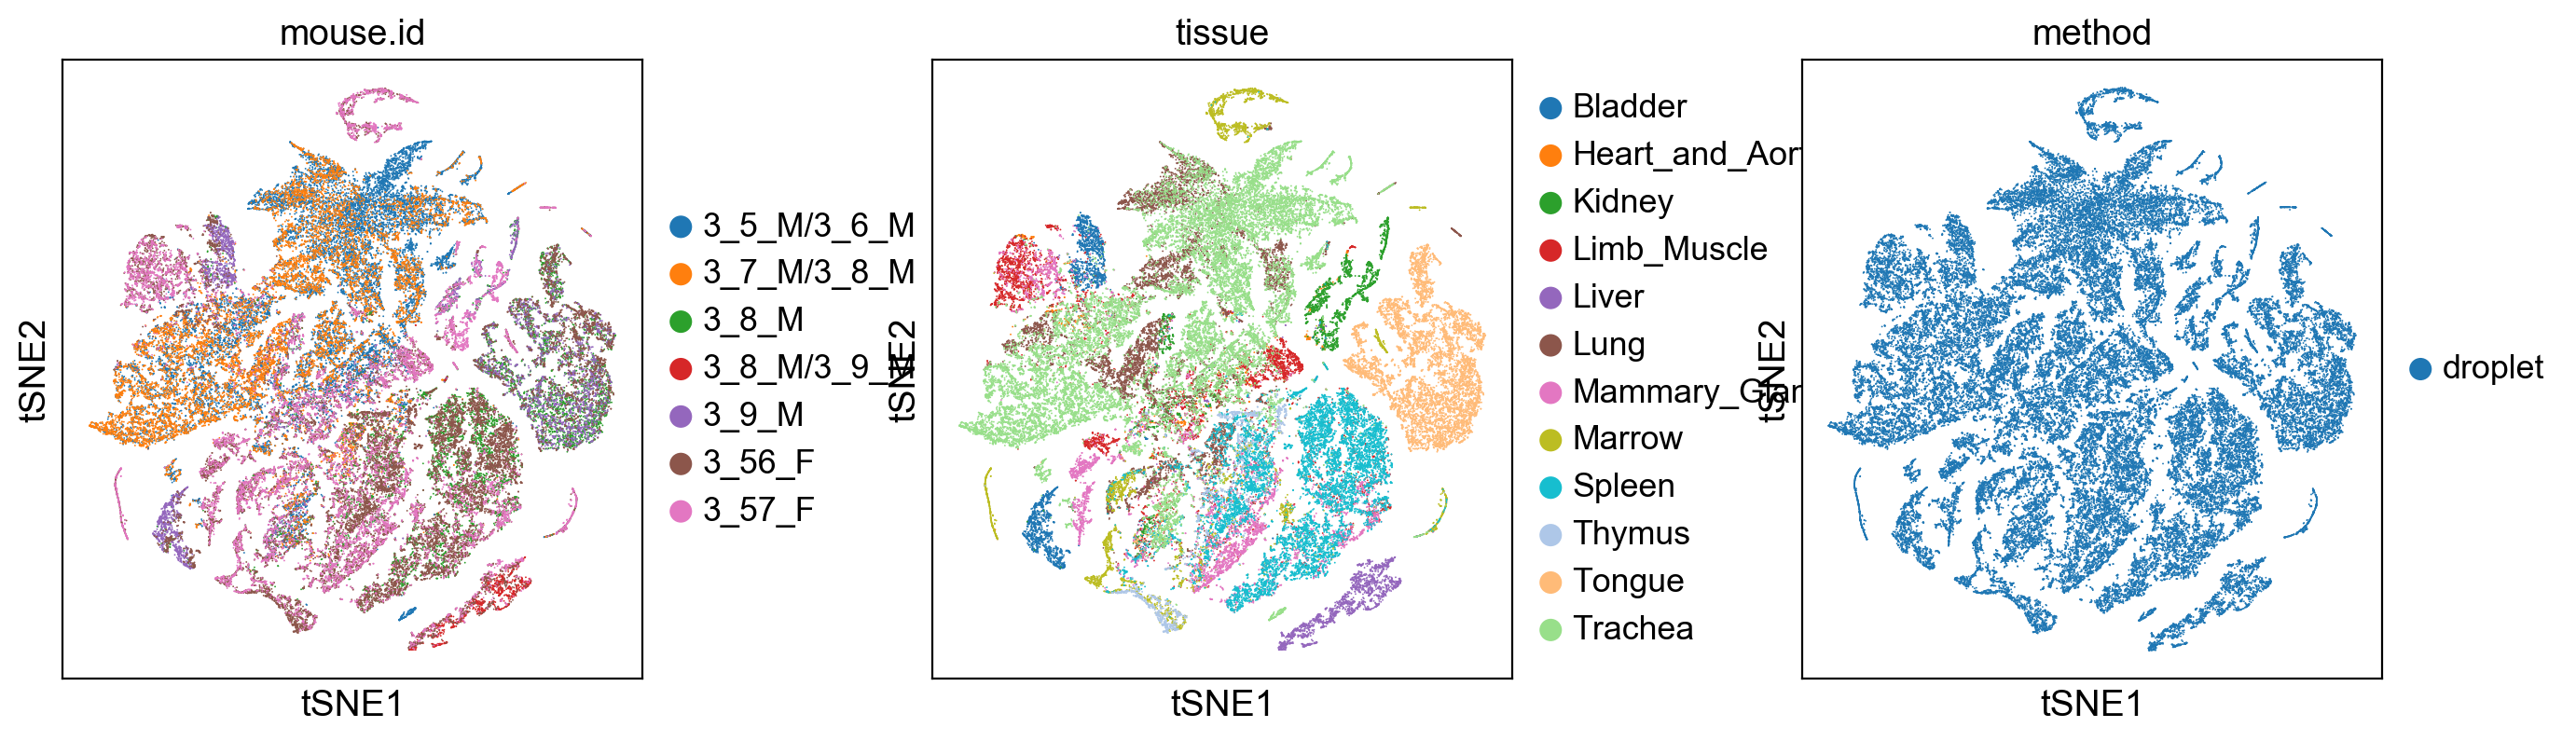

In [46]:
sc.pl.tsne(adata, color=['mouse.id', 'tissue', 'method'])

In [44]:
adata.write(result_file)